In [2]:
from sklearn.impute import KNNImputer

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [5]:
df = pd.read_csv('merged_df.csv')
del df['Unnamed: 0']
df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1.0,choongnam,73,20071228.0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,1.0,gyeongnam,32,19970401.0,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,1.0,gyeonggi,89,20161228.0,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,1.0,incheon,141,20000814.0,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,1.0,gyeongnam,32,20050901.0,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [6]:
df.drop(['inst_id','OC','sido','sgg','openDate'],axis=1, inplace =True)
df.head()

,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [7]:
df.drop(['instkind','ownerChange'],axis=1, inplace =True)
df.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [8]:
df.dtypes

bedCount              float64
revenue1              float64
salescost1            float64
sga1                  float64
salary1               float64
noi1                  float64
noe1                  float64
interest1             float64
ctax1                 float64
profit1               float64
liquidAsset1          float64
quickAsset1           float64
receivableS1          float64
inventoryAsset1       float64
nonCAsset1            float64
tanAsset1             float64
OnonCAsset1           float64
receivableL1          float64
debt1                 float64
liquidLiabilities1    float64
shortLoan1            float64
NCLiabilities1        float64
longLoan1             float64
netAsset1             float64
surplus1              float64
revenue2              float64
salescost2            float64
sga2                  float64
salary2               float64
noi2                  float64
noe2                  float64
interest2             float64
ctax2                 float64
profit2   

In [9]:

# 변수 employee1,2에 콤마(,) 제거 후 float형식으로 변경 
df['employee1'] = df['employee1'].str.replace(',','').astype('float64') 
df['employee2'] = df['employee2'].str.replace(',','').astype('float64') 
df.dtypes

bedCount              float64
revenue1              float64
salescost1            float64
sga1                  float64
salary1               float64
noi1                  float64
noe1                  float64
interest1             float64
ctax1                 float64
profit1               float64
liquidAsset1          float64
quickAsset1           float64
receivableS1          float64
inventoryAsset1       float64
nonCAsset1            float64
tanAsset1             float64
OnonCAsset1           float64
receivableL1          float64
debt1                 float64
liquidLiabilities1    float64
shortLoan1            float64
NCLiabilities1        float64
longLoan1             float64
netAsset1             float64
surplus1              float64
revenue2              float64
salescost2            float64
sga2                  float64
salary2               float64
noi2                  float64
noe2                  float64
interest2             float64
ctax2                 float64
profit2   

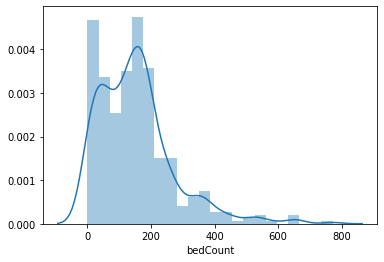

In [10]:
# knn imputer 시행 전에 데이터 분포 확인 
sns.distplot(df['bedCount'])

In [11]:
df1 = df.iloc[:,1:25]
df1.columns.unique

<bound method Index.unique of Index(['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1'],
      dtype='object')>

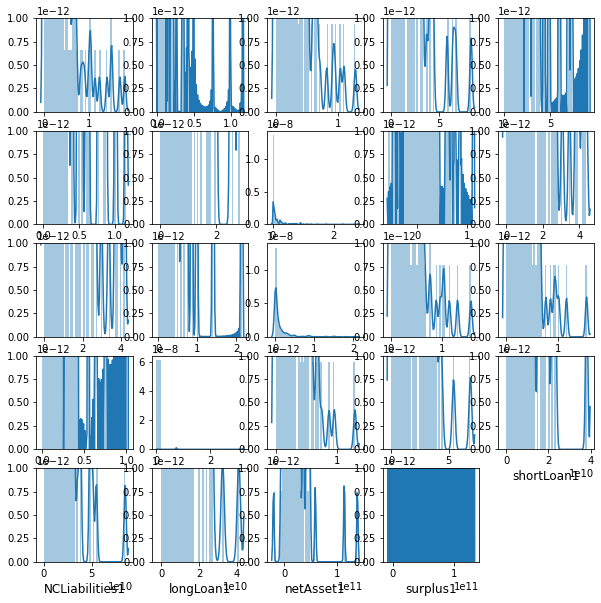

In [48]:
rowCnt = 5
colCnt = 5
subCnt = 1
plt.figure(figsize=(10,10))
for i in df1.columns:
  plt.subplot(rowCnt,colCnt,subCnt)
  plt.xlabel(i,fontsize=12)
  sns.distplot(df1[i])
  subCnt = subCnt + 1 
plt.show()

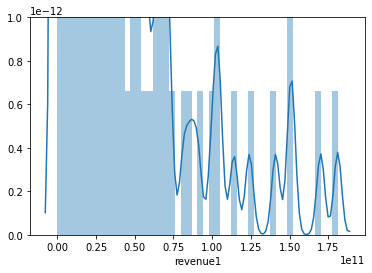

In [49]:
sns.distplot(df['revenue1'])

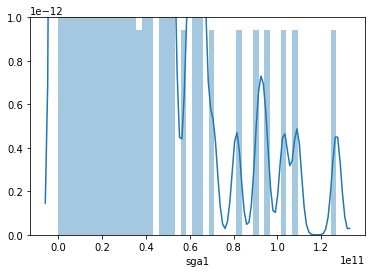

In [14]:
sns.distplot(df['sga1'])

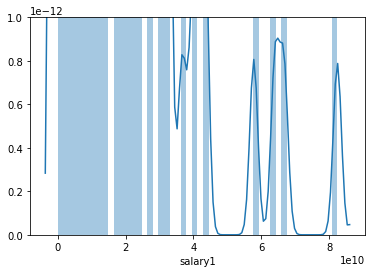

In [15]:
sns.distplot(df['salary1'])

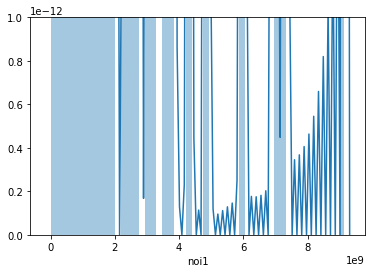

In [16]:
sns.distplot(df['noi1'])

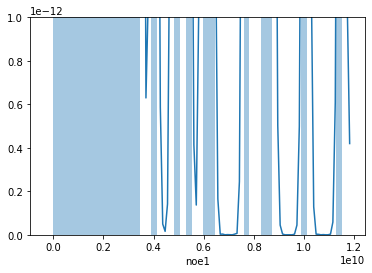

In [17]:
sns.distplot(df['noe1'])

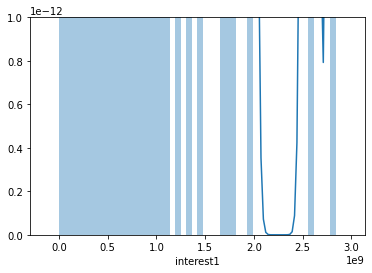

In [18]:
sns.distplot(df['interest1'])

변수들의 분포가 대체로 불규칙하거나 왜도,첨도가 심하다.  
그래서 Scaling을 시도 후 분포를 재확인하겠다. 

In [12]:
# StandardScaler 
standardScaler = StandardScaler()
standardScaler.fit(df)
df_SScaled = standardScaler.transform(df)
df_SScaled

array([[ 0.17742149, -0.4230688 , -0.26071413, ...,  0.01957368,
        -0.48584473, -0.46911797],
       [ 2.11440023,         nan,         nan, ...,         nan,
         3.16084925,  3.63099418],
       [ 2.59246307, -0.55545453, -0.20903519, ..., -0.25005694,
         0.36291219, -0.81398722],
       ...,
       [-0.02864008, -0.01000268, -0.08765946, ..., -0.25005694,
                nan,         nan],
       [        nan,  1.41910164,  3.90696424, ..., -0.25005694,
         0.99947988,  1.05816012],
       [-0.47373306, -0.14672368, -0.14354499, ..., -0.25005694,
                nan,         nan]])

In [13]:
# MinmaxScaler 
minmaxScaler = MinMaxScaler()
minmaxScaler.fit(df)
df_MMcaled = minmaxScaler.transform(df)
df_MMcaled

array([[0.22697795, 0.02330127, 0.        , ..., 0.12798613, 0.03414097,
        0.04137039],
       [0.53177691,        nan,        nan, ...,        nan, 0.4410793 ,
        0.52553329],
       [0.60700389, 0.00554985, 0.00444382, ..., 0.11150397, 0.12885463,
        0.00064641],
       ...,
       [0.19455253, 0.07868876, 0.01488081, ..., 0.11150397,        nan,
               nan],
       [       nan, 0.27031545, 0.35837485, ..., 0.11150397, 0.19988987,
        0.22171946],
       [0.12451362, 0.06035602, 0.01007527, ..., 0.11150397,        nan,
               nan]])

In [14]:
# maxAbsScaler 
maxabsScaler = MaxAbsScaler()
maxabsScaler.fit(df)
df_MAscaled = maxabsScaler.transform(df)
df_MAscaled

array([[0.22697795, 0.02330127, 0.        , ..., 0.01855063, 0.03414097,
        0.04137039],
       [0.53177691,        nan,        nan, ...,        nan, 0.4410793 ,
        0.52553329],
       [0.60700389, 0.00554985, 0.00444382, ..., 0.        , 0.12885463,
        0.00064641],
       ...,
       [0.19455253, 0.07868876, 0.01488081, ..., 0.        ,        nan,
               nan],
       [       nan, 0.27031545, 0.35837485, ..., 0.        , 0.19988987,
        0.22171946],
       [0.12451362, 0.06035602, 0.01007527, ..., 0.        ,        nan,
               nan]])

In [15]:
# RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(df)
df_RScaled = robustScaler.transform(df)
df_RScaled

array([[ 0.24242424, -0.14419695, -0.21369768, ...,  4.92839875,
        -0.17266187, -0.14828897],
       [ 2.02272727,         nan,         nan, ...,         nan,
         5.14388489,  5.54752852],
       [ 2.46212121, -0.43671958,  0.32222139, ...,  0.        ,
         1.0647482 , -0.62737643],
       ...,
       [ 0.0530303 ,  0.76852374,  1.58090756, ...,  0.        ,
                nan,         nan],
       [        nan,  3.92630651, 43.00580985, ...,  0.        ,
         1.99280576,  1.97338403],
       [-0.35606061,  0.46642178,  1.00136541, ...,  0.        ,
                nan,         nan]])

In [16]:
df_SScaled = pd.DataFrame(df_SScaled)
cols = list(df.columns)
df_SScaled.columns = cols
df_SScaled.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.177421,-0.423069,-0.260714,-0.433269,-0.437777,-0.348788,-0.452669,-0.617684,-0.215422,-0.029153,-0.417637,-0.411801,-0.162361,-0.431308,-0.543836,-0.538792,-0.222472,-0.059004,-0.609941,-0.586963,-0.514108,-0.533759,-0.539343,-0.278199,0.002012,-0.394474,-0.261759,-0.389251,-0.394388,-0.370889,-0.454359,-0.529874,-0.225750,-0.089360,-0.404361,-0.399436,-0.069477,-0.414648,-0.495147,-0.488705,-0.204726,-0.05079,-0.563062,-0.535274,-0.466276,-0.492983,-0.504048,-0.276636,0.019574,-0.485845,-0.469118
1,2.114400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.160849,3.630994
2,2.592463,-0.555455,-0.209035,-0.642117,-0.621193,-0.365346,-0.464072,-0.656156,-0.333529,-0.162769,-0.528547,-0.526912,-0.430970,-0.417809,-0.670475,-0.666140,-0.369940,-0.059004,-0.648001,-0.600012,-0.514108,-0.587827,-0.607898,-0.490673,-0.196472,-0.585113,-0.261759,-0.651887,-0.630967,-0.393186,-0.477097,-0.570863,-0.305175,-0.247358,-0.530634,-0.527984,-0.400388,-0.465437,-0.634590,-0.627952,-0.365492,-0.05079,-0.613286,-0.563898,-0.466276,-0.551194,-0.573021,-0.525937,-0.250057,0.362912,-0.813987
3,1.644580,2.390680,-0.260714,3.531976,2.703092,0.172705,0.480422,2.822636,0.315089,0.464811,1.384596,1.218517,-0.435677,4.964488,1.607187,1.505430,3.685773,-0.059004,2.076981,2.742924,4.335761,1.026023,0.808718,0.641590,0.950036,2.380514,-0.261759,3.550647,2.774948,0.263305,0.549453,2.767804,0.619194,0.390007,1.161652,1.029029,-0.400388,4.147751,1.531581,1.406006,3.949446,-0.05079,1.885004,1.621782,2.046308,1.700340,2.097463,0.707032,1.391797,2.479870,2.809877
4,0.350513,1.423899,-0.260714,2.163715,1.929782,-0.245993,0.600043,3.143425,-0.333529,-0.134425,0.377098,0.342561,1.947893,1.119651,1.632999,1.788831,-0.141372,-0.059004,2.562672,2.852836,3.858993,1.769058,2.028834,-0.508563,1.000691,1.547690,-0.261759,2.398559,2.058339,0.429821,0.677185,2.957104,-0.305175,-0.222543,0.215715,0.174762,1.725991,1.188192,1.911793,2.034689,0.504283,-0.05079,2.790064,3.298292,4.328575,1.768049,1.922029,-0.525407,1.664290,0.224742,0.258939


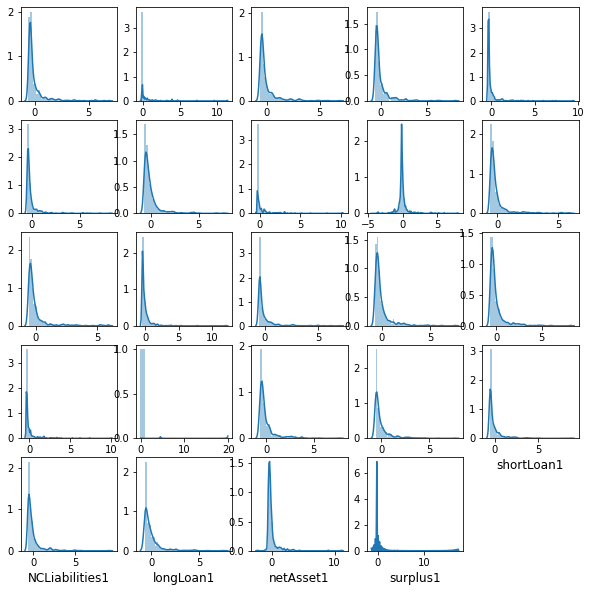

In [17]:
rowCnt = 5
colCnt = 5
subCnt = 1
plt.figure(figsize=(10,10))
for i in df_SScaled.iloc[:,1:25].columns:
  plt.subplot(rowCnt,colCnt,subCnt)
  plt.xlabel(i,fontsize=12)
  sns.distplot(df_SScaled[i])
  subCnt = subCnt + 1 
plt.show()

In [18]:
df_MMcaled = pd.DataFrame(df_MMcaled)
cols = list(df.columns)
df_MMcaled.columns = cols
df_MMcaled.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.226978,0.023301,0.000000,0.031190,0.024684,0.001712,0.001325,0.004658,0.011265,0.351753,0.023084,0.023766,0.021922,0.007268,0.016119,0.015133,0.014224,0.0,0.005293,0.002921,0.000000,0.005646,0.008535,0.144731,0.071041,0.025281,0.0,0.033258,0.026157,0.002513,0.002395,0.003995,0.006739,0.304292,0.014933,0.015268,0.028959,0.007504,0.015537,0.014640,0.016640,0.0,0.005794,0.003255,0.000000,0.006825,0.010773,0.156855,0.127986,0.034141,0.041370
1,0.531777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441079,0.525533
2,0.607004,0.005550,0.004444,0.003521,0.003597,0.000008,0.000003,0.000000,0.000000,0.340934,0.006210,0.006043,0.000378,0.009073,0.000772,0.000772,0.000000,0.0,0.000716,0.001341,0.000000,0.000000,0.000000,0.128751,0.060550,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.138809,0.111504,0.128855,0.000646
3,0.457847,0.400593,0.000000,0.556515,0.385774,0.055360,0.109558,0.421218,0.061864,0.391751,0.297275,0.274770,0.000000,0.728707,0.276791,0.245646,0.391189,0.0,0.328402,0.406172,0.522480,0.168514,0.176366,0.213908,0.121150,0.393284,0.0,0.532166,0.376566,0.073977,0.108134,0.325435,0.078430,0.343829,0.200133,0.184933,0.000000,0.681584,0.241363,0.213839,0.446615,0.0,0.288206,0.248560,0.248212,0.263968,0.417094,0.228058,0.211868,0.365088,0.428571
4,0.254215,0.270959,0.000000,0.375244,0.296870,0.012287,0.123433,0.460060,0.000000,0.343229,0.143995,0.139907,0.191183,0.214637,0.279919,0.277603,0.022046,0.0,0.386807,0.419482,0.471117,0.246099,0.328268,0.127406,0.123827,0.282840,0.0,0.386277,0.297336,0.092740,0.121589,0.343887,0.000000,0.293308,0.088265,0.083468,0.186085,0.244318,0.283728,0.279935,0.090026,0.0,0.392615,0.439216,0.473672,0.271906,0.389694,0.138847,0.228525,0.113436,0.127343


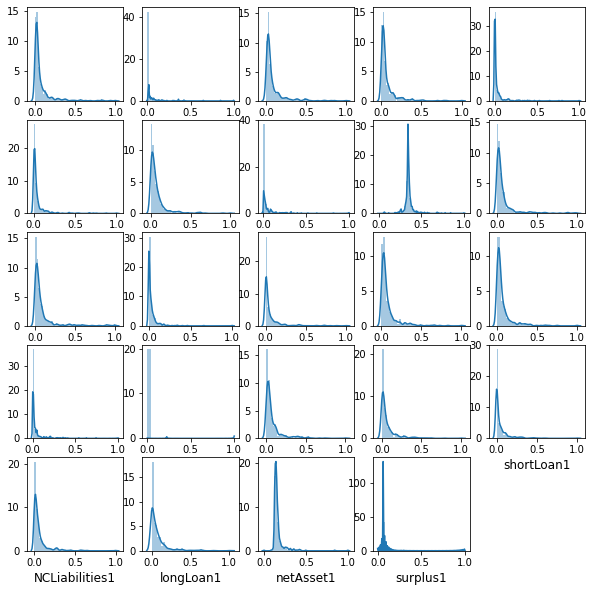

In [19]:
rowCnt = 5
colCnt = 5
subCnt = 1
plt.figure(figsize=(10,10))
for i in df_MMcaled.iloc[:,1:25].columns:
  plt.subplot(rowCnt,colCnt,subCnt)
  plt.xlabel(i,fontsize=12)
  sns.distplot(df_MMcaled[i])
  subCnt = subCnt + 1 
plt.show()

In [20]:
df_MAscaled = pd.DataFrame(df_MAscaled)
cols = list(df.columns)
df_MAscaled.columns = cols
df_MAscaled.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.226978,0.023301,0.000000,0.031190,0.024684,0.001712,0.001325,0.004658,0.011265,0.020090,0.023084,0.023766,0.021922,0.007268,0.016119,0.015133,0.014224,0.0,0.005293,0.002921,0.000000,0.005646,0.008535,0.020464,0.011167,0.025281,0.0,0.033258,0.026157,0.002513,0.002395,0.003995,0.006739,0.018386,0.014933,0.015268,0.028959,0.007504,0.015537,0.014640,0.016640,0.0,0.005794,0.003255,0.000000,0.006825,0.010773,0.020954,0.018551,0.034141,0.041370
1,0.531777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441079,0.525533
2,0.607004,0.005550,0.004444,0.003521,0.003597,0.000008,0.000003,0.000000,0.000000,0.003735,0.006210,0.006043,0.000378,0.009073,0.000772,0.000772,0.000000,0.0,0.000716,0.001341,0.000000,0.000000,0.000000,0.002162,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128855,0.000646
3,0.457847,0.400593,0.000000,0.556515,0.385774,0.055360,0.109558,0.421218,0.061864,0.080551,0.297275,0.274770,0.000000,0.728707,0.276791,0.245646,0.391189,0.0,0.328402,0.406172,0.522480,0.168514,0.176366,0.099691,0.064505,0.393284,0.0,0.532166,0.376566,0.073977,0.108134,0.325435,0.078430,0.074170,0.200133,0.184933,0.000000,0.681584,0.241363,0.213839,0.446615,0.0,0.288206,0.248560,0.248212,0.263968,0.417094,0.103634,0.112960,0.365088,0.428571
4,0.254215,0.270959,0.000000,0.375244,0.296870,0.012287,0.123433,0.460060,0.000000,0.007205,0.143995,0.139907,0.191183,0.214637,0.279919,0.277603,0.022046,0.0,0.386807,0.419482,0.471117,0.246099,0.328268,0.000621,0.067355,0.282840,0.0,0.386277,0.297336,0.092740,0.121589,0.343887,0.000000,0.002888,0.088265,0.083468,0.186085,0.244318,0.283728,0.279935,0.090026,0.0,0.392615,0.439216,0.473672,0.271906,0.389694,0.000044,0.131707,0.113436,0.127343


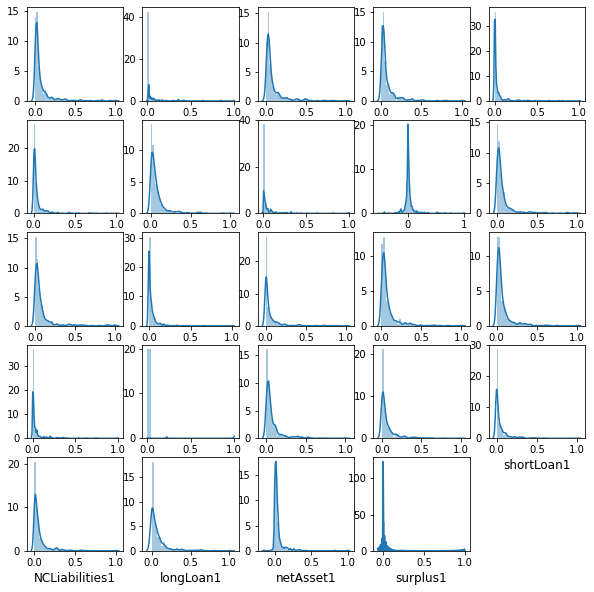

In [21]:
rowCnt = 5
colCnt = 5
subCnt = 1
plt.figure(figsize=(10,10))
for i in df_MAscaled.iloc[:,1:25].columns:
  plt.subplot(rowCnt,colCnt,subCnt)
  plt.xlabel(i,fontsize=12)
  sns.distplot(df_MAscaled[i])
  subCnt = subCnt + 1 
plt.show()

In [22]:
df_RScaled = pd.DataFrame(df_RScaled)
cols = list(df.columns)
df_RScaled.columns = cols
df_RScaled.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.242424,-0.144197,-0.213698,-0.126926,-0.150631,-0.138037,-0.416033,-0.527918,0.628424,0.371854,-0.198951,-0.185107,0.333718,-0.115305,-0.390628,-0.355214,0.493966,0.0,-0.417572,-0.322714,-0.173136,-0.385474,-0.323308,-0.051935,4.258988,-0.090604,-0.171291,-0.055765,-0.095860,-0.160083,-0.327861,-0.441068,0.607229,0.292420,-0.187298,-0.184301,0.606879,-0.120384,-0.316708,-0.314559,0.539762,0.0,-0.365808,-0.272053,-0.070053,-0.289583,-0.281830,-0.041425,4.928399,-0.172662,-0.148289
1,2.022727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.143885,5.547529
2,2.462121,-0.436720,0.322221,-0.537565,-0.487745,-0.205595,-0.449676,-0.594038,-0.065703,-0.171224,-0.459471,-0.458663,-0.272752,-0.085791,-0.624223,-0.587497,-0.185100,0.0,-0.478491,-0.343375,-0.173136,-0.488009,-0.417068,-0.581751,0.000000,-0.505301,-0.171291,-0.570703,-0.549169,-0.247860,-0.395751,-0.520073,-0.012742,-0.307489,-0.497649,-0.504536,-0.185711,-0.268056,-0.574056,-0.578525,-0.139716,0.0,-0.452007,-0.321278,-0.070053,-0.397381,-0.387907,-0.616338,0.000000,1.064748,-0.627376
3,1.590909,6.073128,-0.213698,7.669590,5.622175,1.989669,2.337017,5.384853,3.746288,2.379559,4.034378,3.689250,-0.283380,11.681523,3.577066,3.373431,18.490820,0.0,3.883127,4.949314,8.477444,2.572455,1.520386,2.241610,24.601302,5.945823,-0.171291,7.668996,5.976891,2.336483,2.669288,5.915033,7.202588,2.112551,3.661587,3.374238,-0.185711,13.144831,3.423700,3.277187,18.097394,0.0,3.835813,3.437493,5.358457,3.772136,3.719207,2.227020,30.010350,4.151079,4.406844
4,0.401515,3.936908,-0.213698,4.979297,4.200858,0.281370,2.689955,5.936182,-0.065703,-0.056019,1.667829,1.607590,5.098282,3.275557,3.624678,3.890354,0.867419,0.0,4.660527,5.123332,7.627045,3.981529,3.189093,-0.626361,25.688226,4.134182,-0.171291,5.410155,4.603800,2.991990,3.050667,6.279900,-0.012742,-0.213265,1.336699,1.246118,4.907345,4.539886,4.125397,4.468962,3.536392,0.0,5.389170,6.320631,10.289360,3.897524,3.449396,-0.615117,34.991072,0.863309,0.863118


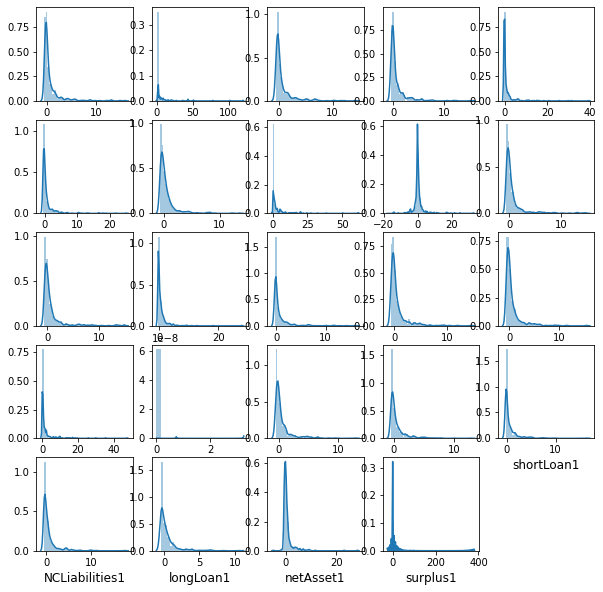

In [23]:
rowCnt = 5
colCnt = 5
subCnt = 1
plt.figure(figsize=(10,10))
for i in df_RScaled.iloc[:,1:25].columns:
  plt.subplot(rowCnt,colCnt,subCnt)
  plt.xlabel(i,fontsize=12)
  sns.distplot(df_RScaled[i])
  subCnt = subCnt + 1 
plt.show()

In [24]:
imputer =  KNNImputer(n_neighbors=7,weights='uniform')
df_imputed = imputer.fit_transform(df)
df_imputed

array([[1.75000000e+02, 4.21753001e+09, 0.00000000e+00, ...,
        1.27122449e+09, 6.20000000e+01, 6.40000000e+01],
       [4.10000000e+02, 5.66910185e+10, 1.31203434e+10, ...,
        6.56143442e+09, 8.01000000e+02, 8.13000000e+02],
       [4.68000000e+02, 1.00452199e+09, 5.15483669e+08, ...,
        0.00000000e+00, 2.34000000e+02, 1.00000000e+00],
       ...,
       [1.50000000e+02, 1.42426650e+10, 1.72617424e+09, ...,
        0.00000000e+00, 4.55571429e+02, 4.48428571e+02],
       [2.66571429e+02, 4.89270967e+10, 4.15714826e+10, ...,
        0.00000000e+00, 3.63000000e+02, 3.43000000e+02],
       [9.60000000e+01, 1.09244396e+10, 1.16873091e+09, ...,
        0.00000000e+00, 4.55571429e+02, 4.48428571e+02]])

In [25]:
# 스케일링 없이 knnimputer한 데이터프레임 
df_imputed = pd.DataFrame(df_imputed)
cols = list(df.columns)
df_imputed.columns = cols
df_imputed.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,1.619468e+07,2.998335e+07,1.568305e+07,1.880807e+07,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,410.0,5.669102e+10,1.312034e+10,4.080951e+10,2.631515e+10,1.162273e+09,1.407767e+09,8.333929e+08,438818159.0,2.076850e+09,1.138581e+10,1.086474e+10,4.551858e+07,5.210768e+08,4.916636e+10,4.786065e+10,3.771522e+08,0.0,3.850150e+10,2.042372e+10,1.020366e+10,1.807779e+10,1.039987e+10,2.205067e+10,6.049939e+09,4.964537e+10,1.214890e+10,3.488148e+10,2.299323e+10,1.851006e+09,1.780638e+09,9.452876e+08,2.451826e+08,2.440166e+09,1.037606e+10,9.865049e+09,3.553533e+07,5.110129e+08,4.761028e+10,4.587257e+10,3.887787e+08,0.0,3.704254e+10,1.424474e+10,5.637182e+09,2.279780e+10,1.638689e+10,2.094380e+10,6.561434e+09,801.0,813.0
2,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,4.768078e+08,1.353672e+09,1.277422e+09,2.188917e+08,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,5.977481e+08,1.522108e+09,1.349851e+09,0.000000e+00,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [27]:
df = pd.read_csv('merged_df.csv')
del df['Unnamed: 0']
df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1.0,choongnam,73,20071228.0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,1.0,gyeongnam,32,19970401.0,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,1.0,gyeonggi,89,20161228.0,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,1.0,incheon,141,20000814.0,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,1.0,gyeongnam,32,20050901.0,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [28]:
df_imputed['inst_id'] = df['inst_id']
df_imputed['OC'] = df['OC']
df_imputed['sido'] = df['sido']
df_imputed['sgg'] = df['sgg']
df_imputed['openDate'] = df['openDate']
df_imputed['instkind'] = df['instkind']
df_imputed['ownerChange'] = df['ownerChange']
df_imputed.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,inst_id,OC,sido,sgg,openDate,instkind,ownerChange
0,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,1.619468e+07,2.998335e+07,1.568305e+07,1.880807e+07,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,1,1.0,choongnam,73,20071228.0,nursing_hospital,same
1,410.0,5.669102e+10,1.312034e+10,4.080951e+10,2.631515e+10,1.162273e+09,1.407767e+09,8.333929e+08,438818159.0,2.076850e+09,1.138581e+10,1.086474e+10,4.551858e+07,5.210768e+08,4.916636e+10,4.786065e+10,3.771522e+08,0.0,3.850150e+10,2.042372e+10,1.020366e+10,1.807779e+10,1.039987e+10,2.205067e+10,6.049939e+09,4.964537e+10,1.214890e+10,3.488148e+10,2.299323e+10,1.851006e+09,1.780638e+09,9.452876e+08,2.451826e+08,2.440166e+09,1.037606e+10,9.865049e+09,3.553533e+07,5.110129e+08,4.761028e+10,4.587257e+10,3.887787e+08,0.0,3.704254e+10,1.424474e+10,5.637182e+09,2.279780e+10,1.638689e+10,2.094380e+10,6.561434e+09,801.0,813.0,3,1.0,gyeongnam,32,19970401.0,general_hospital,same
2,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,4,1.0,gyeonggi,89,20161228.0,nursing_hospital,same
3,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,4.768078e+08,1.353672e+09,1.277422e+09,2.188917e+08,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,7,1.0,incheon,141,20000814.0,general_hospital,same
4,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,5.977481e+08,1.522108e+09,1.349851e+09,0.000000e+00,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,9,1.0,gyeongnam,32,20050901.0,general_hospital,same


In [29]:
df_imputed.to_csv('df_knn_imputed.csv')